# DAT158 ML Mandatory Assignment 2: TMDB Box Office

## 1. Frame the problem and look at the big picture

This machine learning project is about developing and training a model to predict total revenue for films at box offices worldwide. The notebook is structured according to these eight points:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system


## 2. Get the data

In [4]:
# Import necesary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import ast

# Automatically reload modules defined in external files
%reload_ext autoreload
%autoreload 2

# Display plots directly in the notebook
%matplotlib inline

In [5]:
# Data given by the task
print(os.listdir("../data"))

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']


In [6]:
# Uses pandas to read the files
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sampleSubmission = pd.read_csv('../data/sample_submission.csv')

## 3. Explore the data to gain insights

In [7]:
# See the first rows in the training set
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [8]:
# See the first rows of the test set
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [11]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


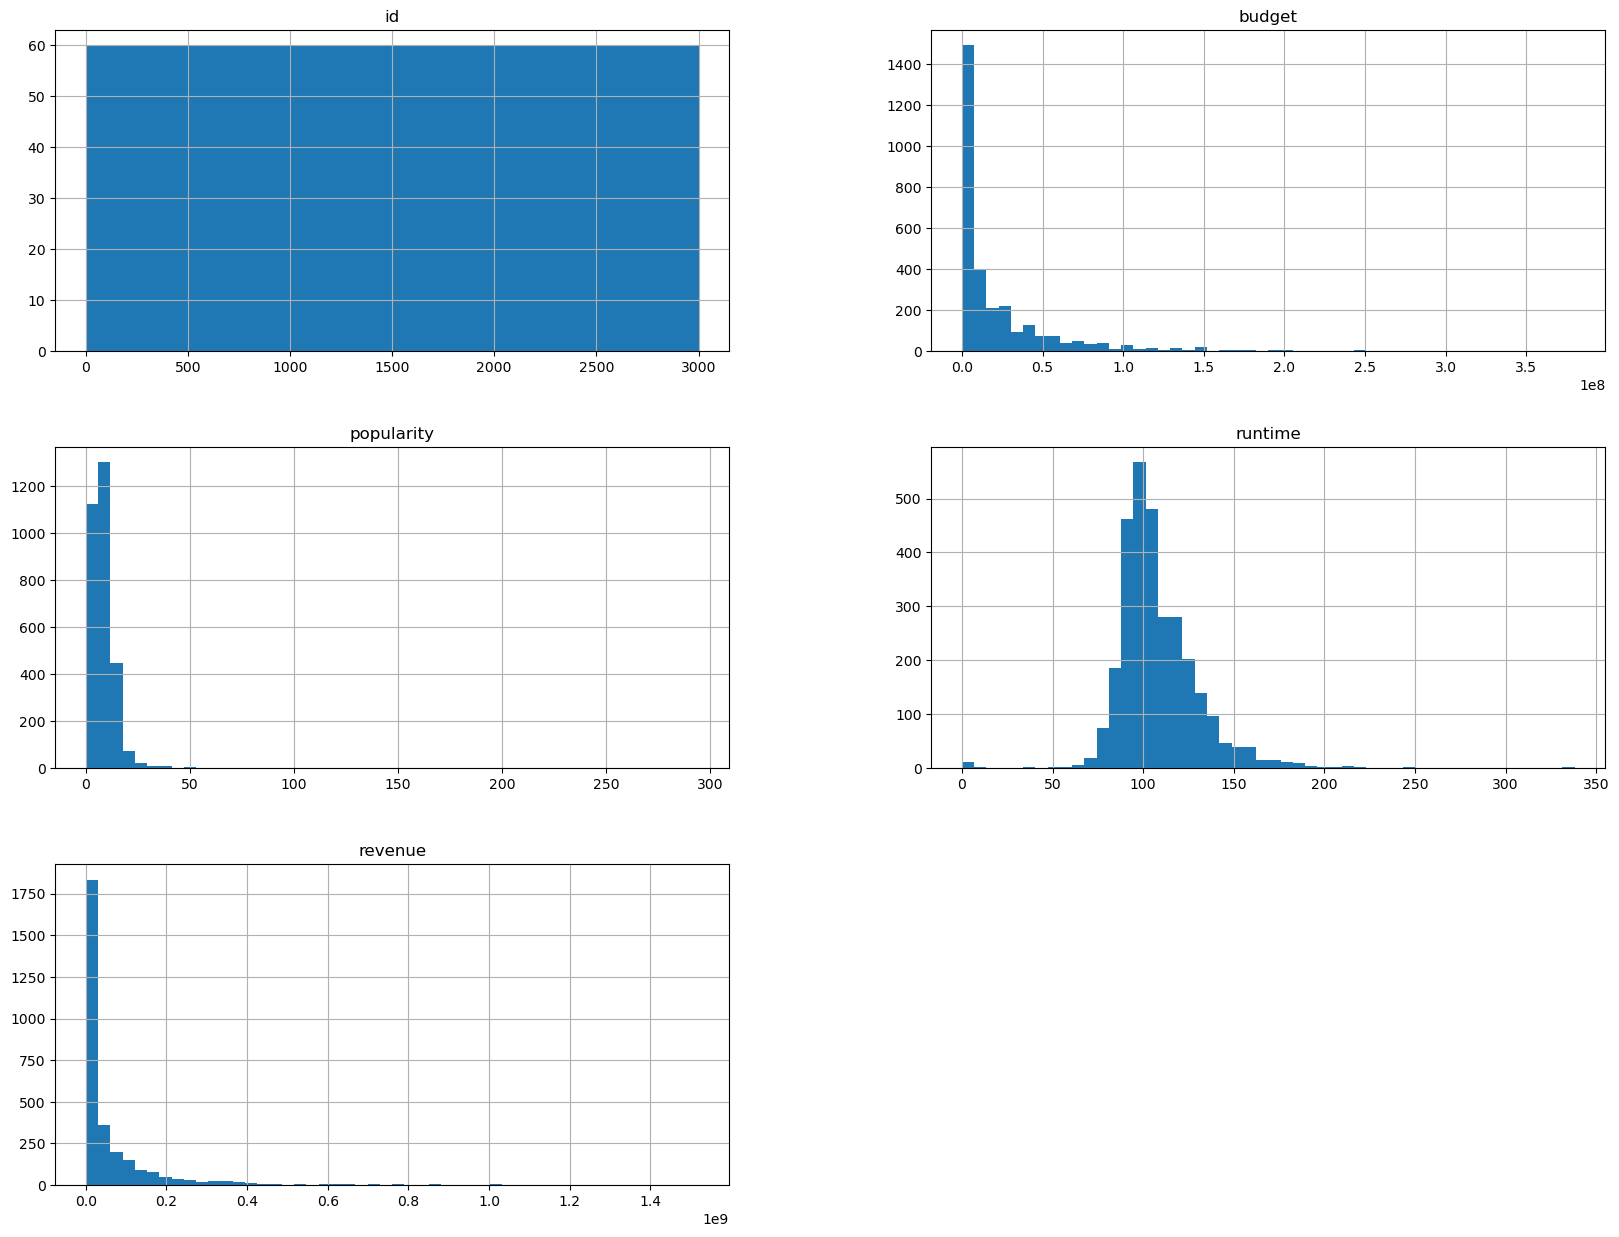

In [12]:
# Histogram to find out more about the training set
train.hist(bins=50, figsize=(20,15))
plt.show()

## 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms

### Data cleaning

#### Removes irrelevant columns
Removes useless columns to make the set smaller. We remove columns we believe are not particularly important for "revenue"

In [13]:
labels = train["revenue"].copy()


list_drop = ["id", "homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title", "status"
             , "crew"];

list_drop_test = ["homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title", "status"
             , "crew"];
train = train.drop(list_drop, axis=1)
test = test.drop(list_drop_test, axis=1)
train = train.drop("revenue", axis=1)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   original_language      3000 non-null   object 
 4   popularity             3000 non-null   float64
 5   production_companies   2844 non-null   object 
 6   production_countries   2945 non-null   object 
 7   release_date           3000 non-null   object 
 8   runtime                2998 non-null   float64
 9   spoken_languages       2980 non-null   object 
 10  Keywords               2724 non-null   object 
 11  cast                   2987 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 281.4+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   original_language      4398 non-null   object 
 5   popularity             4398 non-null   float64
 6   production_companies   4140 non-null   object 
 7   production_countries   4296 non-null   object 
 8   release_date           4397 non-null   object 
 9   runtime                4394 non-null   float64
 10  spoken_languages       4356 non-null   object 
 11  Keywords               4005 non-null   object 
 12  cast                   4385 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 446.8+ KB


#### Belongs to Collection

What seems most useful is whether the film belongs to a collection or not. If the film has a collection, value 1 is given, otherwise value 0.

In [16]:
train["belongs_to_collection"] = np.where(pd.notnull(train["belongs_to_collection"]), 1, 0)
test["belongs_to_collection"] = np.where(pd.notnull(test["belongs_to_collection"]), 1, 0)
train["belongs_to_collection"].head()

0    1
1    1
2    0
3    0
4    0
Name: belongs_to_collection, dtype: int64

#### Fix strings

Some columns contain lists of strings. Here we only want to show off names.
Therefore, create a function that sorts the strings so that we only get the essentials, which in our case is "name".

In [17]:
def fix_strings(s):
    try:
        return ast.literal_eval(s)[0]['name']
    except:
        pass

In [18]:
train.genres = train.genres.apply(fix_strings)
train.production_companies = train.production_companies.apply(fix_strings)
train.production_countries = train.production_countries.apply(fix_strings)
train.spoken_languages = train.spoken_languages.apply(fix_strings)
train.Keywords = train.Keywords.apply(fix_strings)
train.cast = train.cast.apply(fix_strings)

test.genres = test.genres.apply(fix_strings)
test.production_companies = test.production_companies.apply(fix_strings)
test.production_countries = test.production_countries.apply(fix_strings)
test.spoken_languages = test.spoken_languages.apply(fix_strings)
test.Keywords = test.Keywords.apply(fix_strings)
test.cast = test.cast.apply(fix_strings)

Now see that the column above now only gives us "name".
Here we have taken a shortcut, as the function means that only one name appears (for example on the cast, where there may be several actors)

In [19]:
train.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast
0,1,14000000,Comedy,en,6.575393,Paramount Pictures,United States of America,2/20/15,93.0,English,time travel,Rob Corddry
1,1,40000000,Comedy,en,8.248895,Walt Disney Pictures,United States of America,8/6/04,113.0,English,coronation,Anne Hathaway
2,0,3300000,Drama,en,64.299990,Bold Films,United States of America,10/10/14,105.0,English,jazz,Miles Teller
3,0,1200000,Thriller,hi,3.174936,None,India,3/9/12,122.0,English,mystery,Vidya Balan
4,0,0,Action,ko,1.148070,None,South Korea,2/5/09,118.0,한국어/조선말,None,Kim Kang-woo


#### Release date
This function retrieved from Kaggle, from someone who had done the project before.
The function helps sort "release_date" to only get the year of release.
##### Link to the project the code came from: https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation?fbclid=IwAR3wZWesOpiIi88vXgq5QzQnQVdB8lkbMDF-F3tWp2QwCVcfbIIJBlQH-1U

In [20]:

def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [21]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))

In [22]:
train['release_date'].mode()

0    9/10/2010
1    9/10/2015
Name: release_date, dtype: object

As "release_date" has a null value, this is set to 09.10.2010. 2010 is the median year for this set.

In [23]:
test.loc[test['release_date'].isnull() == True, 'release_date'] = '9/10/10'
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

In [24]:
for index in range(3000):
    train['release_date'][index] = train['release_date'][index][-4:]

/var/folders/3_/k1d1yqkd6_l38m94lkzxsy040000gn/T/ipykernel_32189/2998664320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['release_date'][index] = train['release_date'][index][-4:]


In [25]:
for index in range(4398):
    test['release_date'][index] = test['release_date'][index][-4:]

/var/folders/3_/k1d1yqkd6_l38m94lkzxsy040000gn/T/ipykernel_32189/1134052573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['release_date'][index] = test['release_date'][index][-4:]


Changing the name from "release_date" to "release_year" because now there is the year movies are sorted by.

In [26]:
train.rename(columns={'release_date': 'release_year'}, inplace=True)
test.rename(columns={'release_date': 'release_year'}, inplace=True)

The "release_year" column is still an object - changing this to int.

In [27]:
train = train.astype({'release_year': int})
test = test.astype({'release_year': int})

In [28]:
train['release_year']

0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
2995    1994
2996    2013
2997    1996
2998    2004
2999    2011
Name: release_year, Length: 3000, dtype: int64

#### Fill missing values
Machine learning algorithms cannot run with missing values. Consider each column that has "NaN" values and fill these with "None", so that we can eventually run the values through a Pipeline.

In [29]:
train['genres'].fillna('None', inplace=True)
train['production_companies'].fillna('None', inplace=True)
train['production_countries'].fillna('None', inplace=True)
train['spoken_languages'].fillna('None', inplace=True)
train['Keywords'].fillna('None', inplace=True)
train['cast'].fillna('None', inplace=True)

test['genres'].fillna('None', inplace=True)
test['production_companies'].fillna('None', inplace=True)
test['production_countries'].fillna('None', inplace=True)
test['spoken_languages'].fillna('None', inplace=True)
test['Keywords'].fillna('None', inplace=True)
test['cast'].fillna('None', inplace=True)

Choosing to use Simple imputer to solve this for the numeric columns. Safest to run SimpleImputer through all the numeric columns.

In [30]:
imputer = SimpleImputer(strategy="median")
movies_num = train[['belongs_to_collection', 'budget', 'popularity', 'runtime']]
imputer.fit(movies_num)
imputer.statistics_

array([0.0000000e+00, 8.0000000e+06, 7.3748615e+00, 1.0400000e+02])

### Handling Text and Categorical Attributes
Most machine learning algorithms prefer all attributes to be numeric. Since 'genres', 'original_language', 'production_companies', 'production_countries', 'release_year', 'spoken_languages', 'Keywords' and 'cast' are text-based, we will now make them numerical.

In [31]:
movies_cat = train[['genres', 'original_language', 'production_companies', 'production_countries', 'release_year',
                   'spoken_languages', 'Keywords', 'cast']]

Uses OneHotEncoder to turn text values into numeric values.

In [32]:
encoder = OneHotEncoder()
movies_cat = encoder.fit_transform(movies_cat)
movies_cat

<3000x3978 sparse matrix of type '<class 'numpy.float64'>'
	with 24000 stored elements in Compressed Sparse Row format>

In [33]:
encoder.categories_

[array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
        'Horror', 'Music', 'Mystery', 'None', 'Romance', 'Science Fiction',
        'TV Movie', 'Thriller', 'War', 'Western'], dtype=object),
 array(['ar', 'bn', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'fa', 'fi',
        'fr', 'he', 'hi', 'hu', 'id', 'it', 'ja', 'ko', 'ml', 'mr', 'nb',
        'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sr', 'sv', 'ta', 'te', 'tr',
        'ur', 'vi', 'zh'], dtype=object),
 array(['10th Hole Productions', '120dB Films', '1492 Pictures', ...,
        'Роскинопрокат', 'СТВ', 'Фокс'], dtype=object),
 array(['Argentina', 'Australia', 'Austria', 'Bahamas', 'Belgium',
        'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
        'Cambodia', 'Canada', 'Chile', 'China', 'Czech Republic',
        'Denmark', 'Ethiopia', 'Finland', 'France', 'Germany', 'Greece',
        'Hong Kong', 'Hungary', 'Iceland', 'India', 

### Feature Scaling
Machine learning algorithms work poorly if the variation between the values in the various attributes of the training set is large. Therefore, it pays to use StandardScaler to scale down the values.

In [34]:
scaler = StandardScaler()
movies_to_scale = train[['belongs_to_collection', 'budget', 'popularity', 'runtime']]
movies_to_scale = scaler.fit_transform(movies_to_scale)

Here the result is shown after scaling down:

In [35]:
movies_to_scale

array([[ 1.99170465, -0.23045256, -0.15599768, -0.67276814],
       [ 1.99170465,  0.47187212, -0.01771439,  0.23291614],
       [-0.50208247, -0.51948618,  4.61384865, -0.12935757],
       ...,
       [-0.50208247,  1.14718432,  0.49736238,  0.54990563],
       [-0.50208247,  0.5258971 ,  0.6000891 , -0.80862078],
       [-0.50208247,  0.33680969,  0.16929745, -0.08407336]])

## Transformation Pipelines


Earlier in the project, we have now shown manually how to process missing values, text and categorical attributes in addition to scaling down values. We can do most of this in one with the help of Pipelines.

In [36]:
train_num = train[['belongs_to_collection', 'budget', 'popularity', 'runtime']]

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr

array([[ 1.99170465, -0.23045256, -0.15599768, -0.6728692 ],
       [ 1.99170465,  0.47187212, -0.01771439,  0.23310791],
       [-0.50208247, -0.51948618,  4.61384865, -0.12928293],
       ...,
       [-0.50208247,  1.14718432,  0.49736238,  0.5501999 ],
       [-0.50208247,  0.5258971 ,  0.6000891 , -0.80876577],
       [-0.50208247,  0.33680969,  0.16929745, -0.08398408]])

In [37]:
train_cat = train[['genres', 'original_language', 'production_companies', 'production_countries', 'release_year',
                   'spoken_languages', 'Keywords', 'cast']]

In [38]:
num_attribs = list(train_num)
cat_attribs = list(train_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
])

train_prepared = full_pipeline.fit_transform(train)

In [39]:
train_prepared

<3000x3982 sparse matrix of type '<class 'numpy.float64'>'
	with 36000 stored elements in Compressed Sparse Row format>

## 5. Explore many different models and short-list the best ones

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_prepared, labels)

LinearRegression()

In [41]:
some_data = train.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lr.predict(some_data_prepared))

Predictions: [12319726.2972535  95156183.26413709 13154588.92254014 16008796.12714262
  3927964.20195342]


In [42]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [43]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

In [44]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lr_rmse_scores)

Scores: [3.12998780e+08 3.69427836e+08 4.09511495e+08 3.47247925e+08
 2.79127200e+08 3.09430511e+08 3.23688278e+08 2.73809976e+08
 3.81803929e+08 3.76026989e+08]
Mean: 338307291.7995392
Standard deviation: 43339920.02848337


With a standard deviation of just over 43 million, we probably ignore this model.

### Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train_prepared, labels)
print("Predictions:", dtr.predict(some_data_prepared))

Predictions: [12314651. 95149435. 13092000. 16000000.  3923970.]


In [46]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [47]:
dtr_scores = cross_val_score(dtr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)

display_scores(dtr_rmse_scores)

Scores: [1.13580909e+08 9.01363703e+07 1.15461047e+08 9.11156027e+07
 8.05480807e+07 1.07316985e+08 8.75986322e+07 8.51447100e+07
 9.56723503e+07 9.54392571e+07]
Mean: 96201394.41380373
Standard deviation: 11407596.798049787


Here we get a standard deviation of 11.4 million. This is significantly better than 43 million, which we got from linear regression.

### Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train_prepared, labels)
print("Predictions:", rfr.predict(some_data_prepared))

Predictions: [2.57445816e+07 1.10781225e+08 4.57016129e+07 1.01292317e+07
 3.14340246e+06]


In [49]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [50]:
rfr_scores = cross_val_score(rfr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

display_scores(rfr_rmse_scores)

Scores: [73581134.26725945 72370547.62871705 93532010.19289093 72910713.01502523
 75423575.01307729 91544666.56002313 63181564.83042151 79052766.56707555
 80583416.86947751 65062661.26016124]
Mean: 76724305.62041289
Standard deviation: 9417677.00739926


Now the standard deviation is about 9.4 million.

## 6. Fine-tune your models and combine them into a great solution
Here we tried grid search with the best model, namely Decision Tree Regressor

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_split": [10, 20, 40],
             "max_depth": [2, 6, 8],
             "min_samples_leaf": [20, 40, 100], 
             "max_leaf_nodes": [5, 20, 100],
             }

dtr = DecisionTreeRegressor()

grid_search = GridSearchCV(dtr, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_prepared, labels);

In [52]:
# Vis parametre for best resultat
grid_search.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [53]:
model = grid_search.best_estimator_
model

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=10)

In [54]:
model_scores = cross_val_score(model, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
model_rmse_scores = np.sqrt(-model_scores)

display_scores(model_rmse_scores)

Scores: [85465454.77457726 79902500.57668033 97384082.70793496 82208500.23612466
 77616615.96872228 97314362.82483612 76787112.40866172 88173749.25545377
 89228075.29647118 76461821.80512194]
Mean: 85054227.58545843
Standard deviation: 7495257.9923306815


After running a grid search on DTR, the best standard deviation achived of about 7.5 million. In other words, this will be the model.

In [55]:
test_prepared = full_pipeline.transform(test)
revenue = model.predict(test_prepared)
revenue

array([ 3865514.30693069,  3865514.30693069,  6654541.7852349 , ...,
       58863359.04166666, 16806959.76923077,  6909562.5       ])

## Present your solution

The main focus of this machine learning project has been on the deployment part. Therefore, there have been taken some minor "shortcuts" on the way to a finished model. Among other things, some columns where dropped, and also made changes to the data in some columns. A consequence of these "shortcuts" is the function that fixes strings only takes one value. E.g. in "genres" column, movies can have several genres. But the function that fixes strings only keeps one genre.

In this machine learning project, I have learned how to put machine learning models into operation. In point five, different models where examined. Based on cross-validation, two models scored quite well. But Decision Tree Regressor worked best.

In the deployment part, decision where made to only have input values ​​for four "features": budget, release_year, cast and genres. These were chosen since they had the greatest impact on income. All the other "features" get the median value if they are numerical, and the most frequent if they are categorical. Since most of the values ​​are set to certain values ​​"behind the scenes" this is not the most accurate model. In other words, it has some limitations.

## Launch, monitor and maintain your system

Now, there is a web application with the most important features. Without knowing the revenue that actually are compared with, there is no saying on how close the project are, but Kaggle score of 2.67 give some indications. The machine learning model created cannot quite compete with the manual assessment yet, but which with regular training can become more precise.

If the data set had been something the system regularly received new data on, one would have had to monitor the numbers so that the model is trained to be the best it can be. A consequence of such a simple model published is that the model can be underfitted, but one would believe that these features will reduce the risk of this.

A solution for this would of course be to make arrangements to add more and better features. This will increase the risk of getting an overfitted model that does well on the current set, but poorly on new data. It is therefore important to monitor the model - monitoring is also important to prevent arbitrary/incorrect values ​​being entered, which as a whole can have a major impact on the result.

Over time, for example, a factor can affect revenue more than it does today. After some time you then have to go through the set and perhaps add more features, or change the value of features you do not have in the web application (median values ​​tend to change after some time). Models have a tendency to "rot" over time if they are not trained on new data on a regular basis.

In [56]:
sampleSubmission.head()

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000


In [57]:
test.head()

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_year,runtime,spoken_languages,Keywords,cast
0,3001,1,0,Adventure,ja,3.851534,None,Japan,2007,90.0,English,pok√©mon,Craig Blair
1,3002,0,88000,Horror,en,3.559789,Woolner Brothers Pictures Inc.,United States of America,1958,65.0,English,revenge,Allison Hayes
2,3003,0,0,Comedy,en,8.085194,Warner Bros.,United States of America,1997,100.0,English,jealousy,Meg Ryan
3,3004,0,6800000,Drama,fr,8.596012,TS Productions,Canada,2010,130.0,Français,prison,Lubna Azabal
4,3005,0,2000000,History,en,3.217680,None,United States of America,2005,92.0,English,usa,Dennis Hopper


In [58]:
submission = pd.DataFrame({'id': test['id'], 'revenue': revenue})

In [59]:
submission.to_csv('submission.csv', index=False)

## Export trained model

Exporting our model.

In [60]:
from pathlib import Path
NB_DIR = Path.cwd()
MODEL_DIR = NB_DIR/'..'/'models'

In [61]:
from joblib import dump
dump(full_pipeline, MODEL_DIR/'full_pipeline.joblib', compress=6)

['/Users/joakim/Skole/DAT158/DAT158 ML Compulsory assignment 2/nbs/../models/full_pipeline.joblib']